## **How has the 3-Pointer change NBA Basketball?**

Data Visualisation and Analysis of NBA Data for insights

**Part 1** - Wrangling of Core data set ***games_details.csv*** \
**Part 2** - New dataset and creating chart to showcase how 3pt shots affect points scored\
**Part 3** - Form new dataset and compare proportion of 3pt and 2 pt shots across seasons and pace of game\
**Part 4** - Produce charts to analyse % change in pts compared with 2pt and 3pt shot\
**Part 5** - Form new df to capture top 10 scorers to get breakdown and 3FGA at each position\
**Part 6** - Analysis of teams' 3pts scored to overall pts across season\
**Part 7** - Analysis of team wins to number of 3 pointers scored


**-------------------------------------------------------------------------------------------------------------------------**

In [1]:
%%time
#Lib pkg to import

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly
import plotly.offline as offline
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px


Wall time: 2.47 s


In [2]:
start = datetime.now()
#importing games data to df
df_games = pd.read_csv("games.csv") 

In [3]:
# #importing games_details data to df
df_gamesdet = pd.read_csv("games_details.csv", low_memory = False) 
df_gamesdet.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0


### Part 1: Wrangling of datasets to create required datasets for plotting

In [4]:
#consolidating relevant data points to one dataframe df_ptsnatt
df_ptsnatt = df_gamesdet.groupby('GAME_ID')[['PTS','FG3A','FG3M','FGA','FGM','FTA','FTM',
                                             'REB','AST','STL','BLK','TO']].sum().reset_index()
df_ptsnatt['FG2A'],df_ptsnatt['FG2M'] = df_ptsnatt['FGA'] - df_ptsnatt['FG3A'],df_ptsnatt['FGM'] - df_ptsnatt['FG3M']
df_ptsnatt.head()

,GAME_ID,PTS,FG3A,FG3M,FGA,FGM,FTA,FTM,REB,AST,STL,BLK,TO,FG2A,FG2M
0,10300001,175.0,15.0,3.0,146.0,66.0,64.0,40.0,79.0,43.0,17.0,8.0,36.0,131.0,63.0
1,10300002,199.0,28.0,6.0,156.0,72.0,74.0,49.0,91.0,45.0,27.0,11.0,49.0,128.0,66.0
2,10300003,196.0,15.0,8.0,164.0,72.0,69.0,44.0,89.0,44.0,25.0,10.0,38.0,149.0,64.0
3,10300004,175.0,24.0,7.0,143.0,65.0,51.0,38.0,81.0,34.0,18.0,10.0,36.0,119.0,58.0
4,10300005,180.0,19.0,7.0,134.0,68.0,56.0,37.0,66.0,31.0,26.0,5.0,44.0,115.0,61.0


In [5]:
#Create df_season dataset and tidy col in df_season
df_season = df_games.iloc[:,[0,1,5]]
df_season = df_season[["GAME_ID",'GAME_DATE_EST',"SEASON"]]
df_season = df_season.rename(columns = {'GAME_DATE_EST': "GAME_DATE"})
df_season.head()

,GAME_ID,GAME_DATE,SEASON
0,22100213,2021-11-17,2021
1,22100214,2021-11-17,2021
2,22100215,2021-11-17,2021
3,22100216,2021-11-17,2021
4,22100217,2021-11-17,2021


In [6]:
#merge df_season into df_ptsnatt so that season can be a time series data within df_ptsnatt
df_combine = df_ptsnatt.merge(df_season, how = 'left', on = 'GAME_ID')
df_combine = df_combine[['SEASON','GAME_ID','GAME_DATE','PTS','FG3A','FG3M','FG2A','FG2M','FGA','FGM','FTA','FTM','REB','AST','STL','BLK','TO']]
df_combine.head()

,SEASON,GAME_ID,GAME_DATE,PTS,FG3A,FG3M,FG2A,FG2M,FGA,FGM,FTA,FTM,REB,AST,STL,BLK,TO
0,2003,10300001,2003-10-05,175.0,15.0,3.0,131.0,63.0,146.0,66.0,64.0,40.0,79.0,43.0,17.0,8.0,36.0
1,2003,10300002,2003-10-06,199.0,28.0,6.0,128.0,66.0,156.0,72.0,74.0,49.0,91.0,45.0,27.0,11.0,49.0
2,2003,10300003,2003-10-07,196.0,15.0,8.0,149.0,64.0,164.0,72.0,69.0,44.0,89.0,44.0,25.0,10.0,38.0
3,2003,10300004,2003-10-07,175.0,24.0,7.0,119.0,58.0,143.0,65.0,51.0,38.0,81.0,34.0,18.0,10.0,36.0
4,2003,10300005,2003-10-07,180.0,19.0,7.0,115.0,61.0,134.0,68.0,56.0,37.0,66.0,31.0,26.0,5.0,44.0


In [7]:
#create dataframe of mean values for selected statistics

df_mean = df_combine.groupby('SEASON')[['PTS','FGA','FGM','FG3A','FG3M','FG2A','FG2M','FTA','FTM','REB','AST','STL','BLK','TO']].mean().reset_index()
df_mean['PCT_FG3A'], df_mean['PCT_FG2A'] = df_mean['FG3A']/df_mean['FGA']*100,df_mean['FG2A']/df_mean['FGA']*100
# Measure the accuracy of all 2/3 point shots 
df_mean['PCT_FG3M'], df_mean['PCT_FG2M'] = df_mean['FG3M']/df_mean['FG3A']*100,df_mean['FG2M']/df_mean['FG2A']*100
# Measure the accuracy of free throw
df_mean['PCT_FTM'] = df_mean['FTM']/df_mean['FTA']*100
df_mean = df_mean.round(2)
df_mean.head()


,SEASON,PTS,FGA,FGM,FG3A,FG3M,FG2A,FG2M,FTA,FTM,REB,AST,STL,BLK,TO,PCT_FG3A,PCT_FG2A,PCT_FG3M,PCT_FG2M,PCT_FTM
0,2003,185.90,159.05,69.59,29.82,10.30,129.23,59.29,48.64,36.43,84.36,42.29,15.90,10.11,28.55,18.75,81.25,34.54,45.88,74.90
1,2004,193.85,160.00,71.54,31.48,11.17,128.52,60.37,52.49,39.60,83.47,42.15,15.05,9.76,27.86,19.68,80.32,35.49,46.97,75.45
2,2005,193.58,157.28,71.24,31.82,11.34,125.45,59.90,53.41,39.75,81.77,40.84,14.51,9.35,28.05,20.23,79.77,35.64,47.75,74.43
3,2006,196.79,158.69,72.48,33.84,12.04,124.85,60.45,53.04,39.78,82.06,42.23,14.66,9.15,29.65,21.32,78.68,35.58,48.41,75.01
4,2007,198.82,162.23,73.83,35.87,12.94,126.36,60.89,50.71,38.21,83.85,43.08,14.63,9.52,27.47,22.11,77.89,36.08,48.19,75.36


### Part 2: Plots to show correlation between (2PT vs PTS) & (3PT vs PTS)

Note: Need to do analyse to provide reason on the drop in pts despite increase in 3 pt in 2020/2021 (Could be COVID affecting conditioning in the NBA bubble)

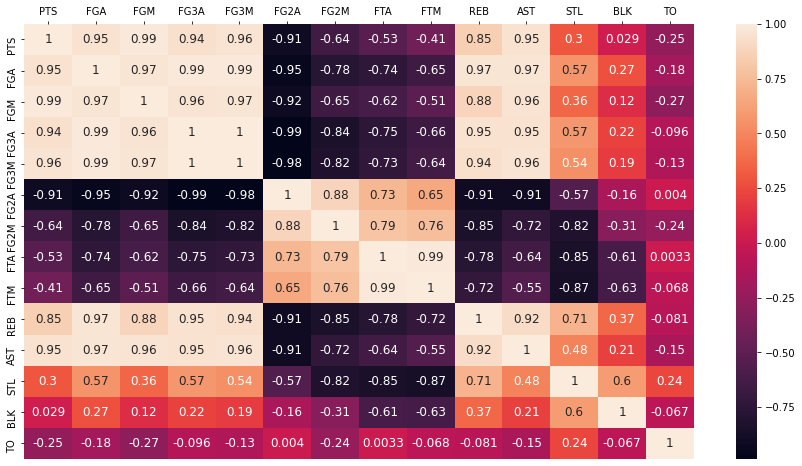

In [8]:
#Plot correlation heatmap of all NBA stats
df_corr = df_mean.copy(deep = True)
df_corr['SEASON'] =pd.to_datetime(df_corr['SEASON'], format ='%Y')
df_corr = df_corr.set_index('SEASON', drop = True)
fig, ax = plt.subplots(figsize=(15,8))
stats_ptscorr = sns.heatmap(df_corr[['PTS','FGA','FGM','FG3A','FG3M','FG2A','FG2M','FTA','FTM','REB','AST','STL','BLK','TO']].corr()
                            ,annot =True, annot_kws={"fontsize":12},ax=ax)
stats_ptscorr.xaxis.set_ticks_position('top')
fig.savefig("C:/Users/edowi/OneDrive/Desktop/Charts/gen_corr_heatmap.png")


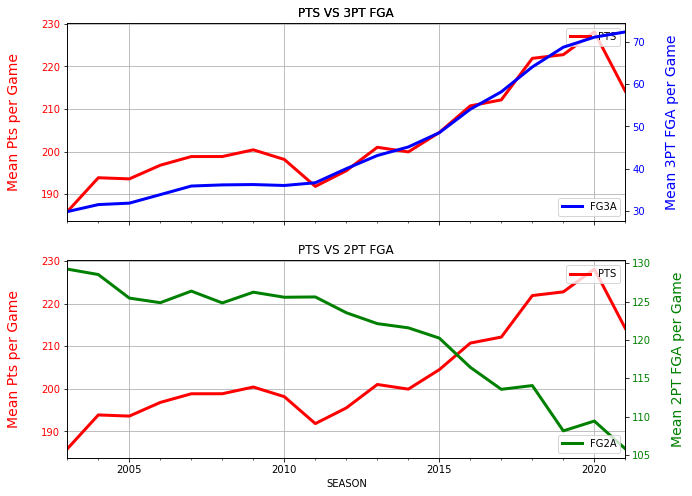

In [9]:
fig,(ax1,ax2) = plt.subplots(nrows =2, ncols =1, figsize =(10,8), sharex = True)

#To plot pts vs 3pts FGA
df_corr['PTS'].plot(kind = 'line', lw=3, color="r", ax=ax1)
ax1.set(title = 'PTS VS 3PT FGA')
ax1.set_ylabel('Mean Pts per Game',fontsize = 14, color ='r')
for label in ax1.get_yticklabels():
    label.set_color("r")
ax1.legend(loc=1)
ax1.yaxis.labelpad = 20

ax1_twin = ax1.twinx()
df_corr['FG3A'].plot(kind = 'line', lw=3, color="b", ax=ax1_twin)
ax1_twin.set(title = 'PTS VS 3PT FGA')
ax1_twin.set_ylabel('Mean 3PT FGA per Game',fontsize = 14, color ='b')
for label in ax1_twin.get_yticklabels():
    label.set_color("b")
ax1_twin.legend(loc=4)
ax1_twin.yaxis.labelpad = 20

#to plot pts vs 2pts FGA
df_corr['PTS'].plot(kind = 'line', lw=3, color="r", ax=ax2)
ax2.set(title = 'PTS VS 2PT FGA')
ax2.set_ylabel('Mean Pts per Game',fontsize = 14, color ='r')
for label in ax2.get_yticklabels():
    label.set_color("r")
ax2.legend(loc=1)
ax2.yaxis.labelpad = 20

ax2_twin = ax2.twinx()
df_corr['FG2A'].plot(kind = 'line', lw=3, color="g", ax=ax2_twin)
ax2_twin.set_ylabel('Mean 2PT FGA per Game',fontsize = 14, color ='g')
for label in ax2_twin.get_yticklabels():
    label.set_color("g")
ax2_twin.legend(loc=4)
ax2_twin.yaxis.labelpad = 20

ax1.grid(True),ax2.grid(True)
# ax2.xaxis.set_major_locator(plt.FixedLocator(np.arange(2003,2022)))
fig.savefig("C:/Users/edowi/OneDrive/Desktop/Charts/static3_2pt_vs_pts.png")

In [10]:
#Create interactive version of above 2 graph
offline.init_notebook_mode(connected=True)
df_corr2 = df_corr.reset_index()

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df_corr2['SEASON'], y=df_corr['FG3A'], name='FG3A'),
               secondary_y = False)

fig.add_trace(
    go.Scatter(x=df_corr2['SEASON'], y=df_corr['PTS'], name = 'PTS'),        
               secondary_y=True)

# Add figure title
fig.update_layout(
    title_text="Compare avg of 3PT FGA with PTS for each season", xaxis = dict(
        tickmode = 'array',
        tickvals = np.arange(2003, 2022)), xaxis_tickformat = '%Y')

# Set x-axis title
fig.update_xaxes(title_text="xaxis title", showgrid = False)

# Set y-axes titles
fig.update_yaxes(title_text="Mean <b>3PT FGA</b> per game", secondary_y=False, showgrid = False)
fig.update_yaxes(title_text="Mean <b>PTS</b> per game", secondary_y=True, showgrid = False)

fig.write_html("C:/Users/edowi/OneDrive/Desktop/Charts/Avg_3pt_pts.html")

In [11]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df_corr2['SEASON'], y=df_corr['FG2A'], name='FG2A', line = dict(color='green')),
               secondary_y = False)

fig.add_trace(
    go.Scatter(x=df_corr2['SEASON'], y=df_corr['PTS'], name = 'PTS', line = dict(color='red')),        
               secondary_y=True)

# Add figure title
fig.update_layout(
    title_text="Compare avg of 2PT FGA with PTS for each season", 
    xaxis = dict(
        tickmode = 'array',
        tickvals = np.arange(2003, 2022)), xaxis_tickformat = '%Y'

)

# Set x-axis title
fig.update_xaxes(title_text="NBA Season", showgrid = False)

    
# Set y-axes titles
fig.update_yaxes(title_text="Mean <b>3PT FGA</b> per game", secondary_y=False, showgrid = False)
fig.update_yaxes(title_text="Mean <b>PTS</b> per game", secondary_y=True, showgrid = False)
fig.write_html("C:/Users/edowi/OneDrive/Desktop/Charts/Avg_2pt_pts.html")
fig

In [12]:
#To see if the game has become faster with increase in 3FGA attempts
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df_corr2['SEASON'], y=df_corr['FGA'], name='FGA', line = dict(color='green')),
               secondary_y = False)

fig.add_trace(
    go.Scatter(x=df_corr2['SEASON'], y=df_corr['FG3A'], name = 'FG3A', line = dict(color='blue')),        
               secondary_y=True)

# Add figure title
fig.update_layout(
    title_text="Compare avg of 2PT FGA with PTS for each season", 
    xaxis = dict(
        tickmode = 'array',
        tickvals = np.arange(2003, 2022)), xaxis_tickformat = '%Y'

)

# Set x-axis title
fig.update_xaxes(title_text="NBA Season", showgrid = False)

    
# Set y-axes titles
fig.update_yaxes(title_text="Mean <b>FGA</b> per game", secondary_y=False, showgrid = False)
fig.update_yaxes(title_text="Mean <b>3PT FGA</b> per game", secondary_y=True, showgrid = False)
fig.write_html("C:/Users/edowi/OneDrive/Desktop/Charts/Avg_FGA_FG3A.html")
fig

==Need== to find out the outlier where pts drop while 3pts attempt increase==

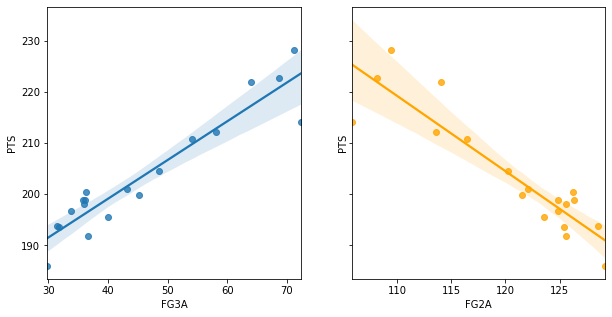

In [13]:
fig,(axa,axb) = plt.subplots(nrows =1, ncols =2, figsize =(10,5), sharey =True)
sns.regplot(x='FG3A',y='PTS',data=df_corr, ax = axa)
sns.regplot(x='FG2A',y='PTS',data=df_corr,ax = axb, color = 'orange')
fig.savefig("C:/Users/edowi/OneDrive/Desktop/Charts/regplot_w_pts.png")

In [14]:
#check shot accuracy to understand why 2021 season points drop
#Will need to check for number of games and news of NBA bubble

trace0 = go.Scatter(
    x = df_mean['SEASON'], 
    y = df_mean['PCT_FG3M'],
    name  = '3PT shot accuracy',
    line = dict(color = ('green'), width = 3) 
)

trace1 = go.Scatter(
    x = df_mean['SEASON'], 
    y = df_mean['PCT_FG2M'],
    name  = '2PT shot accuracy',
    line = dict(color = ('blue'), width = 3, dash = 'dot') 
)

data = [trace0, trace1]

layout = dict(title = 'Shot Accuracy Comparison',
              xaxis = {'title':'SEASON',
                       'tickmode' : 'array',
                       'tickvals' : np.arange(2003, 2022), 
                       'tickformat' : '%Y'},
              yaxis = {'title': 'Shot %'}
             )

fig = go.Figure(data=data, layout =layout)
fig.update_xaxes(nticks = 19, tick0 = 2003, dtick = 1)

fig.write_html("C:/Users/edowi/OneDrive/Desktop/Charts/shot_accuracy.html")


In [15]:
#check no of games
df_gameamt = df_combine.groupby('SEASON')['SEASON'].value_counts()
df_gameamt

SEASON  SEASON
2003    2003      1286
2004    2004      1362
2005    2005      1432
2006    2006      1419
2007    2007      1411
2008    2008      1425
2009    2009      1424
2010    2010      1422
2011    2011      1104
2012    2012      1420
2013    2013      1427
2014    2014      1418
2015    2015      1416
2016    2016      1405
2017    2017      1382
2018    2018      1378
2019    2019      1241
2020    2020      1264
2021    2021       289
Name: SEASON, dtype: int64

### Part 3: Plot to show correlation between and Proportion of 3PT & 2PT Shots

In [16]:
#Create df_pct to show the percentage of each type of shot attempts for each season
#Use in Part 3
df_pct = df_mean.loc[:,['SEASON','FGA','PCT_FG3A','PCT_FG2A']].round(0)
df_pct['SEASON'] = pd.to_datetime(df_pct['SEASON'], format = '%Y').dt.year
# df_pct = df_pct.set_index('SEASON', drop = True)
df_pct

,SEASON,FGA,PCT_FG3A,PCT_FG2A
0,2003,159.0,19.0,81.0
1,2004,160.0,20.0,80.0
2,2005,157.0,20.0,80.0
3,2006,159.0,21.0,79.0
4,2007,162.0,22.0,78.0
5,2008,161.0,22.0,78.0
6,2009,162.0,22.0,78.0
7,2010,162.0,22.0,78.0
8,2011,162.0,23.0,77.0
9,2012,164.0,24.0,76.0


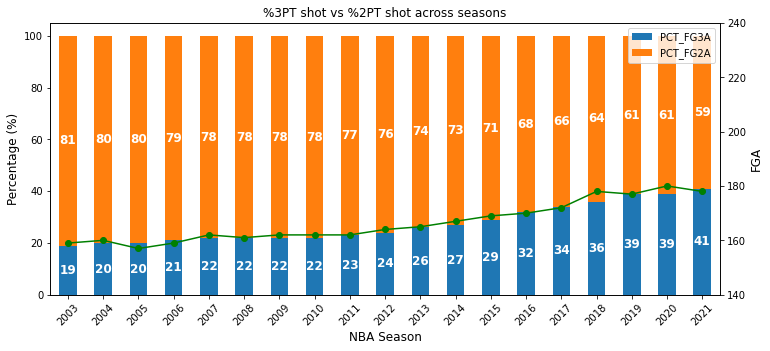

In [17]:
##To plot the comparison of the proportion of 3 pt to 2 pt shots across seasons
fig,ax = plt.subplots(figsize =(12,5))
ax_twin = ax.twinx()

df_pct['FGA'].plot(kind = 'line', marker = 'o', color = 'green', label = 'Avg No of FGA',zorder = 5, ax =ax_twin)
ax_twin.set_ylabel('FGA', fontsize =12)

# to plot % stacked bar chart
df_pct[['PCT_FG3A','PCT_FG2A']].plot(kind='bar', stacked=True,
        title='%3PT shot vs %2PT shot across seasons', mark_right =True, zorder = 0, ax =ax)

for c in ax.containers:  
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, label_type='center', color = 'white', fontsize = 12,fontweight = 'bold')

ax.set_ylabel('Percentage (%)',fontsize = 12)
ax.set_xlabel('NBA Season',fontsize = 12)
ax_twin.set_yticks(np.arange(140,260,20))
ax.set_xticklabels(df_pct['SEASON'], rotation = 45)

fig.savefig("C:/Users/edowi/OneDrive/Desktop/Charts/Prop_of_shots.png")

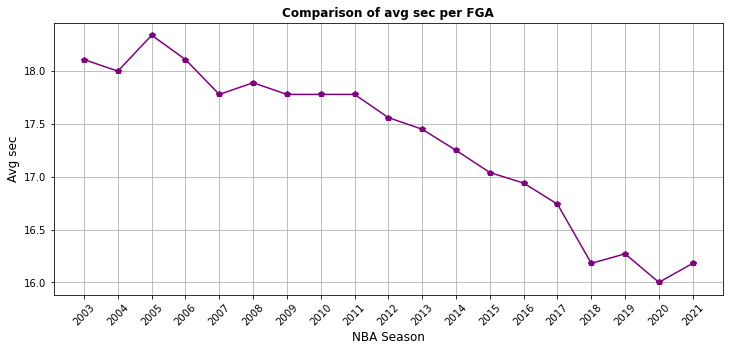

In [18]:
#no of sec per attempt for each season
df_pct['sec_per_FGA'] = round((48*60)/df_pct['FGA'],2)


fig,ax = plt.subplots(figsize =(12,5))
df_pct['sec_per_FGA'].plot(kind = 'line', marker = 'p', color ='purple', ax = ax)
ax.set_title ('Comparison of avg sec per FGA', fontsize = 12, fontweight ='bold')
ax.set_ylabel('Avg sec',fontsize = 12)
ax.set_xlabel('NBA Season',fontsize = 12)
ax.set_xticks(np.arange(0,19,1))
ax.set_xticklabels(df_pct['SEASON'], rotation = 45)
ax.grid(True)
fig.savefig("C:/Users/edowi/OneDrive/Desktop/Charts/avg_sec.png")


### Part 4: Plot %change in points vs 2 types of shot to analyse efficiency of the shots to gain points

In [19]:
#To find % change in pts compared with % increase in 3pts/2pts attempt
#Use in Part 4
df_pct_chg = df_mean.loc[:,['SEASON','PTS','FG3A','FG2A']]
df_pct_chg = df_pct_chg.set_index('SEASON', drop = True)
df_pct_chg = df_pct_chg.pct_change(fill_method = 'ffill').dropna().reset_index()
df_pct_chg['SEASON_RNG']=(df_pct_chg['SEASON'] - 1).astype(str) + '-' + df_pct_chg['SEASON'].astype(str)
df_pct_chg = df_pct_chg[['SEASON_RNG','SEASON','PTS','FG3A','FG2A']].drop(columns = 'SEASON')
df_pct_chg.head()

,SEASON_RNG,PTS,FG3A,FG2A
0,2003-2004,0.042765,0.055667,-0.005494
1,2004-2005,-0.001393,0.010801,-0.023887
2,2005-2006,0.016582,0.063482,-0.004783
3,2006-2007,0.010316,0.059988,0.012095
4,2007-2008,0.000050,0.007527,-0.012187


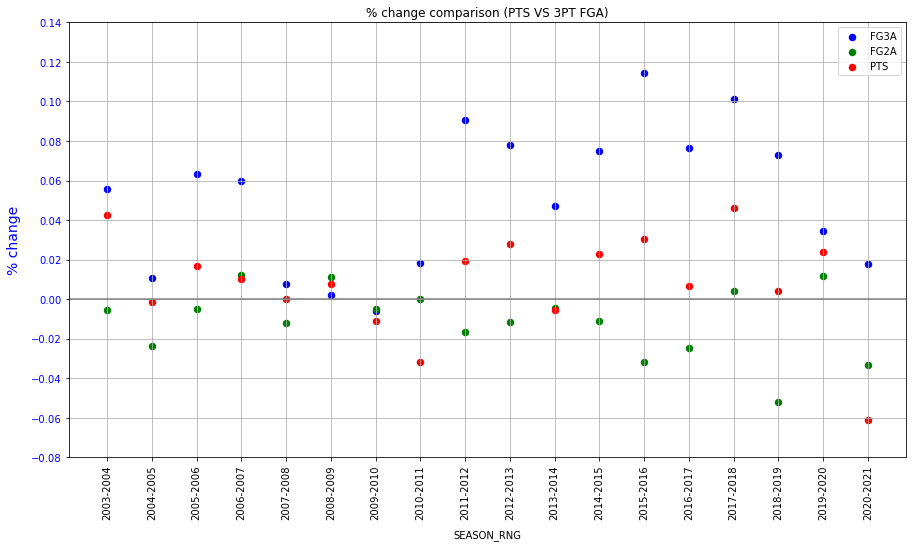

In [20]:
# To plot the comparison graph to check effciency of 3PT shots
fig,ax3 = plt.subplots(figsize =(15,8))

#To plot %chg of 3pt vs PTS
ax3.axhline(y = 0, color='grey', linestyle='-', linewidth = 1.5)
df_pct_chg.plot(kind = 'scatter',x = 'SEASON_RNG', y = 'FG3A', lw=3, color="b", label = 'FG3A',ax=ax3)
df_pct_chg.plot(kind = 'scatter', x = 'SEASON_RNG', y = 'FG2A', lw=3, color="g", label = 'FG2A', ax=ax3)
df_pct_chg.plot(kind = 'scatter',x ='SEASON_RNG',y ='PTS', lw=3, color="red", label = 'PTS',ax=ax3)
ax3.set_title('% change comparison (PTS VS 3PT FGA)')
ax3.set_ylabel('% change',fontsize = 14, color ='b')
ax3.set_yticks(np.arange(-0.08,0.16,0.02))
for label in ax3.get_xticklabels():
    label.set_rotation(90)
for label in ax3.get_yticklabels():
    label.set_color("b")
ax3.legend(loc=1)
ax3.yaxis.labelpad = 10
ax3.xaxis.labelpad = 10

ax3.grid(True)
# ax3.xaxis.set_major_locator(plt.FixedLocator(df_pct_chg['SEASON_RNG']))

#For effieciency should i measure total 3 pts and 2 pts scored and see change in 3pt to overall points?
#I need to define what i mean by efficiency
fig.savefig("C:/Users/edowi/OneDrive/Desktop/Charts/compare_pct_chg.png")

In [21]:
# To plot heatmap with correlation to check efficiency
df_pct_chg = df_pct_chg.set_index('SEASON_RNG', drop = True)



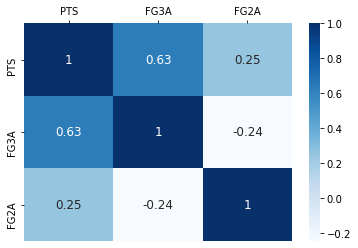

In [22]:
pct_chg_corr = sns.heatmap(df_pct_chg.corr()
                            ,annot =True, annot_kws={"fontsize":12}, cmap = 'Blues')
pct_chg_corr.xaxis.set_ticks_position('top')

### Part 5: Top 10 Scorer Charts 

In [23]:
#Create df for top scorers across seasons
df_gamesdet2 = df_gamesdet.merge(df_season, how = 'left', on = 'GAME_ID')
df_gamesdet2.head()


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,GAME_DATE,SEASON
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0,2021-11-17,2021
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0,2021-11-17,2021
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0,2021-11-17,2021
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0,2021-11-17,2021
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0,2021-11-17,2021


In [24]:
#top10 scorers for each season
df_players = df_gamesdet2.groupby(['SEASON','PLAYER_NAME','START_POSITION'])[['REB','AST','STL','BLK','TO','PF','PTS','FG3A','FG3M']].sum().reset_index()
df_players['3PT_%'] = round(df_players['FG3M']/df_players['FG3A']*100,2).fillna(0)
df_top10 = df_players.sort_values(by = ['SEASON','PTS'],ascending = False).groupby('SEASON').head(10).reset_index(drop=True)
# df_top10['3PT_%'] = round(df_top10['FG3M']/df_top10['FG3A']*100,2).fillna(0)

#Mean 3pt% of top10 scorers across seasons
df_mean3pt = df_top10.groupby('SEASON')['3PT_%'].mean().reset_index()

#Distribution of position for top10 scorers for each season
#For each season, count the number of F, G ,C and use the counts to form a data Frame with cols = [Season, F,G,C]
df_count = pd.DataFrame()
season = [yr for yr in df_top10['SEASON'].unique()]

for yr in season:
    df1 = pd.DataFrame({'SEASON':yr, 
                        'GUARD':df_top10['START_POSITION'][(df_top10['START_POSITION'] == 'G') & (df_top10['SEASON'] == yr)].value_counts().reset_index(drop =True),
                        'FORWARD':df_top10['START_POSITION'][(df_top10['START_POSITION'] == 'F') & (df_top10['SEASON'] == yr)].value_counts().reset_index(drop =True),
                        'CENTER':df_top10['START_POSITION'][(df_top10['START_POSITION'] == 'C') & (df_top10['SEASON'] == yr)].value_counts().reset_index(drop =True)
                       })
    df_count = pd.concat([df_count,df1], ignore_index = True).fillna(0)

df_countpos = df_count.merge(df_mean3pt, how='left', on='SEASON').drop_duplicates().sort_values(by = 'SEASON').set_index('SEASON', drop = True)
df_countpos.index = pd.to_datetime(df_countpos.index, format = '%Y').year
df_countpos

,GUARD,FORWARD,CENTER,3PT_%
SEASON,,,,
2003,5,4,1.0,27.446
2004,5,3,2.0,27.844
2005,5,5,0.0,32.386
2006,4,5,1.0,26.645
2007,4,5,1.0,28.285
2008,5,4,1.0,32.195
2009,4,5,1.0,28.365
2010,5,4,1.0,30.795
2011,4,6,0.0,31.143


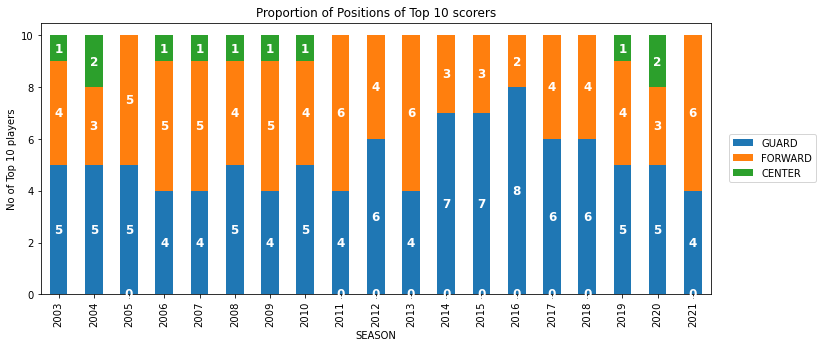

In [25]:
fig,ax4 = plt.subplots(figsize =(12,5))
df_countpos[['GUARD', 'FORWARD', 'CENTER']].plot(kind = 'bar',
                                                 stacked =True, ax =ax4)
# remove the labels parameter if it's not needed for customized labels
for c in ax4.containers:
    ax4.bar_label(c, label_type='center', color = 'white', fontsize = 12,fontweight = 'bold')
    
ax4.set_title('Proportion of Positions of Top 10 scorers')
ax4.set_ylabel('No of Top 10 players')
ax4.legend(bbox_to_anchor=(1.165, .5), loc='right')
fig.savefig("C:/Users/edowi/OneDrive/Desktop/Charts/pos_brkdown.png")

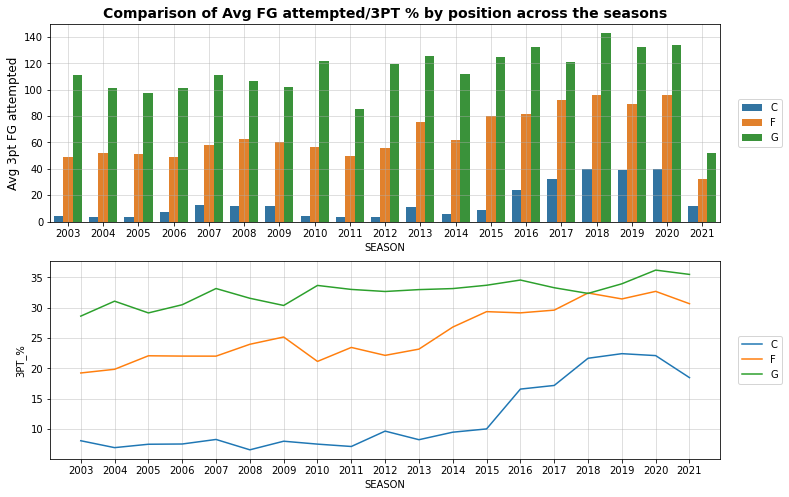

In [26]:
import matplotlib.dates as mdates
df_pos = df_players.groupby(['SEASON','START_POSITION'])[['FG3A', '3PT_%']].mean().round(2).reset_index()
df_pos['SEASON'] = pd.to_datetime(df_pos['SEASON'], format = '%Y').dt.year

fig,(ax,ax1) = plt.subplots(nrows = 2, ncols =1, figsize = (12,8))
sns.barplot(data = df_pos,x = 'SEASON', y = 'FG3A', hue = 'START_POSITION', ci = None,ax=ax)
ax.grid(True, alpha = .5)
ax.set_title('Comparison of Avg FG attempted/3PT % by position across the seasons',
            fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Avg 3pt FG attempted',fontsize = 12)
ax.legend(bbox_to_anchor=(1.1, .5), loc='right')

sns.lineplot(data = df_pos,x = 'SEASON', y = '3PT_%', hue = 'START_POSITION', ci = None,ax=ax1)
ax1.legend(bbox_to_anchor=(1.1, .5), loc='right')
ax1.grid(True, alpha = .5)
# ax1.set_xlim(2002, 2022)

ax1.xaxis.set_major_locator(plt.FixedLocator(np.arange(2003,2022)))
fig.savefig("C:/Users/edowi/OneDrive/Desktop/Charts/avg3ptfg_pct_seasons.png")

In [27]:
np.arange(20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [28]:
df_top10[df_top10['START_POSITION'] == 'C']

,SEASON,PLAYER_NAME,START_POSITION,REB,AST,STL,BLK,TO,PF,PTS,FG3A,FG3M,3PT_%
15,2020,Nikola Jokic,C,959.0,729.0,113.0,60.0,283.0,238.0,2321.0,307.0,122.0,39.74
19,2020,Joel Embiid,C,720.0,198.0,69.0,92.0,220.0,164.0,1894.0,218.0,78.0,35.78
29,2019,Nikola Jokic,C,912.0,624.0,111.0,62.0,298.0,291.0,1914.0,354.0,121.0,34.18
118,2010,Dwight Howard,C,1191.0,110.0,111.0,197.0,312.0,283.0,1946.0,8.0,0.0,0.00
128,2009,Dwight Howard,C,1237.0,163.0,86.0,277.0,325.0,346.0,1757.0,7.0,0.0,0.00
134,2008,Dwight Howard,C,1446.0,155.0,97.0,291.0,307.0,372.0,2091.0,4.0,0.0,0.00
149,2007,Dwight Howard,C,1319.0,119.0,82.0,210.0,295.0,312.0,1884.0,4.0,0.0,0.00
159,2006,Amar'e Stoudemire,C,896.0,89.0,90.0,124.0,244.0,323.0,1896.0,6.0,1.0,16.67
170,2004,Amar'e Stoudemire,C,849.0,146.0,83.0,155.0,227.0,325.0,2461.0,19.0,3.0,15.79
178,2004,Shaquille O'Neal,C,862.0,225.0,41.0,190.0,245.0,314.0,1921.0,0.0,0.0,0.00


## Part 6: Analyis on Team

To do scatterplot of individual teams comparing 3pt to pts. Each chart by season

In [29]:
#consolidating relevant data points to one dataframe df_team
df_team = df_gamesdet.groupby(['GAME_ID','TEAM_ID'])[['PTS','FG3A','FG3M','FGA','FGM','FTA','FTM',
                                             'REB','AST','STL','BLK','TO']].sum().reset_index()
df_team['FG2A'],df_team['FG2M'] = df_team['FGA'] - df_team['FG3A'],df_team['FGM'] - df_team['FG3M']
df_team.head()

,GAME_ID,TEAM_ID,PTS,FG3A,FG3M,FGA,FGM,FTA,FTM,REB,AST,STL,BLK,TO,FG2A,FG2M
0,10300001,1610612742,85.0,8.0,2.0,76.0,34.0,30.0,15.0,38.0,20.0,9.0,4.0,18.0,68.0,32.0
1,10300001,1610612762,90.0,7.0,1.0,70.0,32.0,34.0,25.0,41.0,23.0,8.0,4.0,18.0,63.0,31.0
2,10300002,1610612749,94.0,13.0,2.0,75.0,32.0,40.0,28.0,43.0,20.0,9.0,4.0,24.0,62.0,30.0
3,10300002,1610612763,105.0,15.0,4.0,81.0,40.0,34.0,21.0,48.0,25.0,18.0,7.0,25.0,66.0,36.0
4,10300003,1610612739,100.0,6.0,4.0,77.0,38.0,29.0,20.0,52.0,25.0,10.0,7.0,25.0,71.0,34.0


In [30]:
# merge to tag season
df_combine2 = df_team.merge(df_season, how = 'left', on = 'GAME_ID')
df_combine2 = df_combine2[['SEASON','TEAM_ID','GAME_ID','GAME_DATE','PTS','FG3A','FG3M','FG2A','FG2M','FGA','FGM','FTA','FTM','REB','AST','STL','BLK','TO']]
df_tavg = df_combine2.groupby(['SEASON', 'TEAM_ID'])['PTS','FG3A','FG3M','FG2A','FG2M','FGA','FGM','FTA','FTM','REB','AST','STL','BLK','TO'].mean().reset_index()
df_tavg.head()

C:\Users\edowi\AppData\Local\Temp/ipykernel_992/374546731.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,SEASON,TEAM_ID,PTS,FG3A,FG3M,FG2A,FG2M,FGA,FGM,FTA,FTM,REB,AST,STL,BLK,TO
0,2003,1610612737,92.662651,15.132530,5.084337,64.493976,29.337349,79.626506,34.421687,24.144578,18.734940,42.746988,20.072289,7.626506,4.939759,15.566265
1,2003,1610612738,94.689655,19.264368,6.632184,58.609195,27.781609,77.873563,34.413793,25.620690,19.229885,40.126437,20.390805,9.321839,4.080460,15.988506
2,2003,1610612739,92.880952,9.571429,3.023810,72.607143,32.595238,82.178571,35.619048,24.845238,18.619048,45.607143,22.071429,7.190476,6.571429,14.369048
3,2003,1610612740,91.066667,20.066667,6.433333,60.077778,27.077778,80.144444,33.511111,23.422222,17.611111,42.700000,20.866667,8.433333,4.244444,14.244444
4,2003,1610612741,89.265060,15.168675,5.192771,66.746988,28.771084,81.915663,33.963855,22.265060,16.144578,43.277108,21.722892,8.000000,4.879518,15.228916


In [31]:
# import team details csv
df_teamdet = pd.read_csv('teams.csv').iloc[:,[1,4]]
df_teamdet = df_teamdet.rename(columns = {'ABBREVIATION': "TEAM_ABB"})
df_teamdet.head()

,TEAM_ID,TEAM_ABB
0,1610612737,ATL
1,1610612738,BOS
2,1610612740,NOP
3,1610612741,CHI
4,1610612742,DAL


In [32]:
#merge teamdet to tavg
df_tavg = df_tavg.merge(df_teamdet, how = 'left', on = 'TEAM_ID')
df_tavg = df_tavg[['SEASON','TEAM_ID','TEAM_ABB','PTS','FG3A','FG3M','FG2A','FG2M','FGA','FGM','FTA','FTM','REB','AST','STL','BLK','TO']].drop(columns = 'TEAM_ID')
df_tavg.head()

,SEASON,TEAM_ABB,PTS,FG3A,FG3M,FG2A,FG2M,FGA,FGM,FTA,FTM,REB,AST,STL,BLK,TO
0,2003,ATL,92.662651,15.132530,5.084337,64.493976,29.337349,79.626506,34.421687,24.144578,18.734940,42.746988,20.072289,7.626506,4.939759,15.566265
1,2003,BOS,94.689655,19.264368,6.632184,58.609195,27.781609,77.873563,34.413793,25.620690,19.229885,40.126437,20.390805,9.321839,4.080460,15.988506
2,2003,CLE,92.880952,9.571429,3.023810,72.607143,32.595238,82.178571,35.619048,24.845238,18.619048,45.607143,22.071429,7.190476,6.571429,14.369048
3,2003,NOP,91.066667,20.066667,6.433333,60.077778,27.077778,80.144444,33.511111,23.422222,17.611111,42.700000,20.866667,8.433333,4.244444,14.244444
4,2003,CHI,89.265060,15.168675,5.192771,66.746988,28.771084,81.915663,33.963855,22.265060,16.144578,43.277108,21.722892,8.000000,4.879518,15.228916


In [33]:
# calculate points scored from 3pt and 2pt
df_tavg['3PT_pts'],df_tavg['2PT_pts'] = df_tavg['FG3M']*3,df_tavg['FG2M']*2
df_tavg.head()

,SEASON,TEAM_ABB,PTS,FG3A,FG3M,FG2A,FG2M,FGA,FGM,FTA,FTM,REB,AST,STL,BLK,TO,3PT_pts,2PT_pts
0,2003,ATL,92.662651,15.132530,5.084337,64.493976,29.337349,79.626506,34.421687,24.144578,18.734940,42.746988,20.072289,7.626506,4.939759,15.566265,15.253012,58.674699
1,2003,BOS,94.689655,19.264368,6.632184,58.609195,27.781609,77.873563,34.413793,25.620690,19.229885,40.126437,20.390805,9.321839,4.080460,15.988506,19.896552,55.563218
2,2003,CLE,92.880952,9.571429,3.023810,72.607143,32.595238,82.178571,35.619048,24.845238,18.619048,45.607143,22.071429,7.190476,6.571429,14.369048,9.071429,65.190476
3,2003,NOP,91.066667,20.066667,6.433333,60.077778,27.077778,80.144444,33.511111,23.422222,17.611111,42.700000,20.866667,8.433333,4.244444,14.244444,19.300000,54.155556
4,2003,CHI,89.265060,15.168675,5.192771,66.746988,28.771084,81.915663,33.963855,22.265060,16.144578,43.277108,21.722892,8.000000,4.879518,15.228916,15.578313,57.542169


In [34]:
#Draw plotly scatter chart to show comparison
fig = px.scatter(df_tavg, x='3PT_pts', y='PTS', range_x=[5,55], range_y=[80, 125], color ='SEASON', hover_name='TEAM_ABB')

fig.update_layout(
    title_text="3PTS vs Total PTS by Team",
    xaxis = dict(title = '<b>PTS from 3-Pointers</b>'),
    yaxis = dict(title = '<b>Total PTS</b>')
)
fig.show()
fig.write_html("C:/Users/edowi/OneDrive/Desktop/Charts/3pt_pts_byteam.html")

## Part 7: Finding Team win pct to team avg 3points scored for that season

Will be in scatter plot as per 3pts vs total pts

In [35]:
#add new column to record wins/loss of the game of away team
df_games['AWAY_TEAM_WINS'] = np.where(df_games['HOME_TEAM_WINS']== 1, 0, 1)
df_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,AWAY_TEAM_WINS
0,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,...,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1,0
1,2021-11-17,22100214,Final,1610612765,1610612754,2021,1610612765,97.0,0.425,0.750,...,42.0,1610612754,89.0,0.418,0.737,0.243,14.0,43.0,1,0
2,2021-11-17,22100215,Final,1610612737,1610612738,2021,1610612737,110.0,0.506,0.833,...,40.0,1610612738,99.0,0.440,0.824,0.268,24.0,42.0,1,0
3,2021-11-17,22100216,Final,1610612751,1610612739,2021,1610612751,109.0,0.458,0.840,...,47.0,1610612739,99.0,0.393,0.857,0.250,20.0,50.0,1,0
4,2021-11-17,22100217,Final,1610612748,1610612740,2021,1610612748,113.0,0.483,0.824,...,39.0,1610612740,98.0,0.440,0.786,0.286,18.0,38.0,1,0


In [36]:
#create home and away df and adjust column title
df_hgames = df_games.loc[:,['SEASON', 'HOME_TEAM_ID','HOME_TEAM_WINS']]
df_hgames = df_hgames.rename(columns = {'HOME_TEAM_ID':'TEAM_ID','HOME_TEAM_WINS':'TEAM_WINS'})
df_agames = df_games.loc[:,['SEASON', 'VISITOR_TEAM_ID','AWAY_TEAM_WINS']]
df_agames = df_agames.rename(columns = {'VISITOR_TEAM_ID':'TEAM_ID','AWAY_TEAM_WINS':'TEAM_WINS'})
df_agames.head()

,SEASON,TEAM_ID,TEAM_WINS
0,2021,1610612764,0
1,2021,1610612754,0
2,2021,1610612738,0
3,2021,1610612739,0
4,2021,1610612740,0


In [37]:
#concat the 2 home and away df
df_winloss = pd.concat([df_hgames,df_agames])

df_winloss.head(20)

,SEASON,TEAM_ID,TEAM_WINS
0,2021,1610612766,1
1,2021,1610612765,1
2,2021,1610612737,1
3,2021,1610612751,1
4,2021,1610612748,1
5,2021,1610612752,0
6,2021,1610612749,1
7,2021,1610612750,1
8,2021,1610612760,1
9,2021,1610612756,1


In [38]:
df_winloss_ttl = df_winloss.groupby(['SEASON','TEAM_ID'])['TEAM_WINS'].agg(['count', 'sum']).reset_index()
df_winloss_ttl = df_winloss_ttl.rename(columns = {'count':'GAMES','sum':'WINS'})
df_winloss_ttl['win_%'] = df_winloss_ttl['WINS']/df_winloss_ttl['GAMES']*100
df_winloss_ttl.head()

,SEASON,TEAM_ID,GAMES,WINS,win_%
0,2003,1610612737,90,33,36.666667
1,2003,1610612738,94,40,42.553191
2,2003,1610612739,90,41,45.555556
3,2003,1610612740,97,50,51.546392
4,2003,1610612741,90,26,28.888889


In [39]:
#merge data set to get Team abb into df
df_winloss_ttl = df_winloss_ttl.merge(df_teamdet, how = 'left', on = 'TEAM_ID')

In [40]:
#merge data to get col FG3A and 3PT_pts for comparison
df_winloss_ttl = df_winloss_ttl.merge(df_tavg[['SEASON','TEAM_ABB','FG3A', '3PT_pts']], how = 'left', on = ['SEASON','TEAM_ABB'])

In [41]:
#change from int to str to make it into categorical data
df_winloss_ttl.SEASON = df_winloss_ttl.SEASON.astype(str)

In [42]:
#Draw plotly scatter chart to show comparison
fig = px.scatter(df_winloss_ttl, x='FG3A', y='win_%', range_x=[5,60], range_y=[0, 100], color ='SEASON', hover_name='TEAM_ABB')
fig.update_layout(
    title_text="3PTS vs Win Pct by Team",
    xaxis = dict(title = '<b>PTS from 3-Pointers</b>'),
    yaxis = dict(title = '<b>Win Percentage</b>')
)
#To make only year visible for better comparison
year = (df_winloss_ttl['SEASON'].unique())[1:].tolist()
fig.for_each_trace(lambda trace: trace.update(visible="legendonly") 
                   if trace.name in year else ())
fig.show()
fig.write_html("C:/Users/edowi/OneDrive/Desktop/Charts/win_pct_byteam.html")

In [43]:
end = datetime.now()
time = end-start
print(time)

0:00:08.597417
